## **Decision Tree Project: Post-Surgery Recovery Time Estimation**

### **Project Description**
This project aims to predict how many days a patient will need to recover after surgery. I will use a machine learning model called a Decision Tree to do this.       
The model looks at:

- The type of surgery (like heart, bone, or brain surgery)

- The patient’s age

- Their pre-surgery health details, like heart rate, blood pressure, and oxygen level

By learning from previous patients’ recovery patterns, the model helps doctors and hospitals estimate recovery time for new patients. This can help with better treatment planning and hospital resource management.

### **Project Objective**
+ To build a predictive model that estimates a patient’s recovery time (in days) after surgery using medical and personal data.

+ To analyze how different factors (like procedure type, age, and vital signs) affect recovery time.

+ To help medical professionals plan patient care more efficiently and improve decision-making.

+ To demonstrate the use of Decision Tree Regression in a real-world healthcare problem.

### **Step 1 :- Define the Problem**

**Goal:** 
- Predict how many days a patient will take to recover after surgery. 
+ To analyze how different factors (like procedure type, age, and vital signs) affect recovery time.

+ To help medical professionals plan patient care more efficiently and improve decision-making.

+ To demonstrate the use of Decision Tree Regression in a real-world healthcare problem.


**Type:** Regression (target is a continuous variable: Recovery_Time_Days)

### **Step 2 : Import Libraries**

#### **pandas:** Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
#### **matplotlib.pyplot:** Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.


#### **sklearn.model_selection:**
#### **train_test_split:** Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.  


#### **sklearn.preprocessing:**
#### **OneHotEncoder:** Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features  


####  **sklearn.compose:** 
####  **ColumnTransformer:** Used to apply different preprocessing steps to specific columns (e.g., encode only categorical features).   


####  **sklearn.pipeline:**
####  **Pipeline:** Used to combine preprocessing and modeling steps into a single, clean, and reusable workflow.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### **Step 3:-Load the dataset and Explore the Dataset (EDA)**

In [34]:
df = pd.read_csv("post_surgery_recovery_data.csv")

In [36]:
df.head()

,Age,Procedure_Type,Heart_Rate,Blood_Pressure,Oxygen_Saturation,Recovery_Time_Days
0,69,Plastic,69.0,116.0,97.0,13
1,32,Cardiac,83.0,123.0,97.0,28
2,89,Cardiac,79.0,117.0,97.0,25
3,78,Neuro,70.0,119.0,99.0,34
4,38,Neuro,92.0,130.0,96.0,36


In [42]:
df.shape

(1000, 6)

In [38]:
df.describe ()

,Age,Heart_Rate,Blood_Pressure,Oxygen_Saturation,Recovery_Time_Days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.881000,75.344000,120.371000,97.021000,21.771000
std,20.958915,10.135008,15.259299,1.982546,11.333005
min,18.000000,41.000000,71.000000,92.000000,1.000000
25%,34.750000,68.000000,110.000000,96.000000,11.000000
50%,52.500000,75.500000,121.000000,97.000000,21.000000
75%,71.000000,82.000000,130.000000,98.000000,32.000000
max,89.000000,108.000000,169.000000,104.000000,44.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   Procedure_Type      1000 non-null   object 
 2   Heart_Rate          1000 non-null   float64
 3   Blood_Pressure      1000 non-null   float64
 4   Oxygen_Saturation   1000 non-null   float64
 5   Recovery_Time_Days  1000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 47.0+ KB


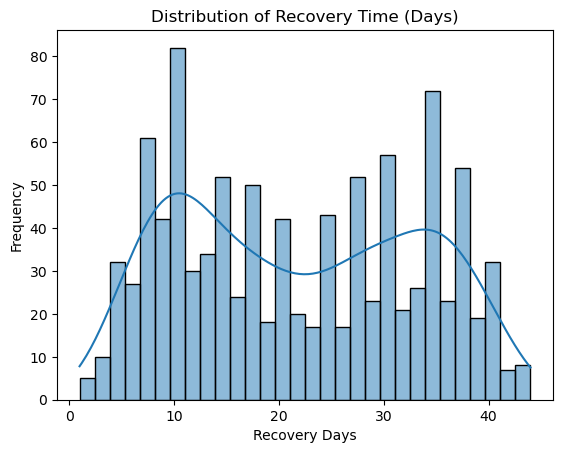

In [48]:
sns.histplot(df["Recovery_Time_Days"], bins=30, kde=True)
plt.title("Distribution of Recovery Time (Days)")
plt.xlabel("Recovery Days")
plt.ylabel("Frequency")
plt.show()

##### **Insights:-**
- Most patients recover in 10 to 35 days.
- The distribution is slightly right-skewed, meaning a few recoveries take longer.
- Recovery time has a single clear peak (unimodal).
- No extreme outliers; recovery times are mostly consistent.



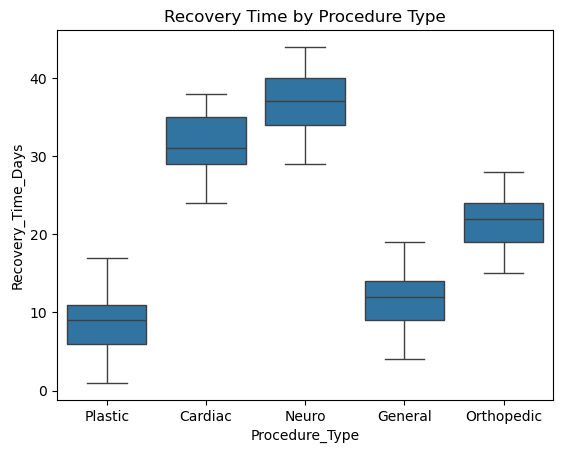

In [53]:
sns.boxplot(data=df, x="Procedure_Type", y="Recovery_Time_Days")
plt.title("Recovery Time by Procedure Type")
plt.show()

##### **Insights:-**
- Cardiac and Neuro surgeries have the longest recovery times.
- Plastic and General surgeries show shorter, more consistent recovery periods.
- Orthopedic has moderate recovery time with some variability.
- The boxplot highlights how procedure type significantly affects recovery time.

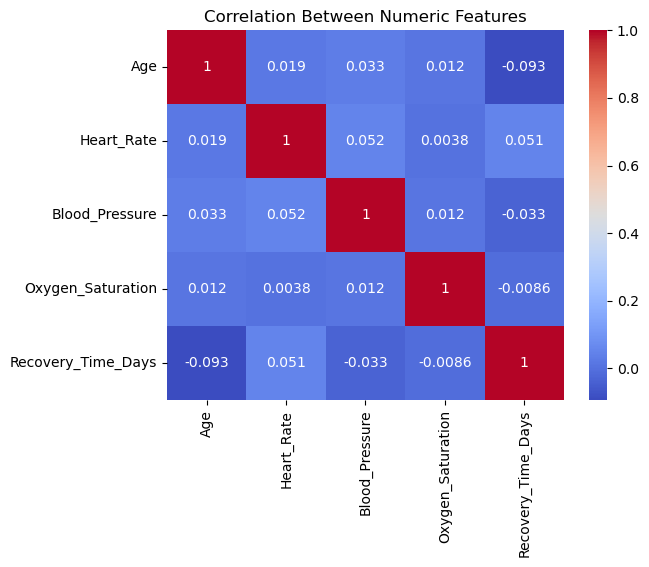

In [59]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

##### **Insights:-**
- Age has a positive correlation with recovery time — older patients tend to recover slower.
- Oxygen Saturation and Heart Rate show a slight negative correlation with recovery time — better vitals, faster recovery.
- Correlations are not very strong, but provide useful signals for prediction.










### **Step 4 :Preprocessing the Data**

In [66]:
# Features and Target
X = df.drop("Recovery_Time_Days", axis=1)
y = df["Recovery_Time_Days"]

In [68]:
# Categorical Encoding
categorical_features = ["Procedure_Type"]
categorical_transformer = OneHotEncoder()

In [70]:
# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features)],
    remainder="passthrough"
)

In [72]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Step 5 : Importing the Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)


### **Step 6 :Train the Model**

In [84]:
# Creating pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

pipeline.fit(X_train, y_train)


D:\PYTHON\envs\pga35_2\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Procedure_Type'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

### **Step 7 :Predictions**

In [92]:
y_pred = pipeline.predict(X_test)


### **Step 8 :Evaluate the Model**

In [103]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 13.957435919792236
R² Score: 0.8990269910444706


### **Step 9 : Visualize the Tree**

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

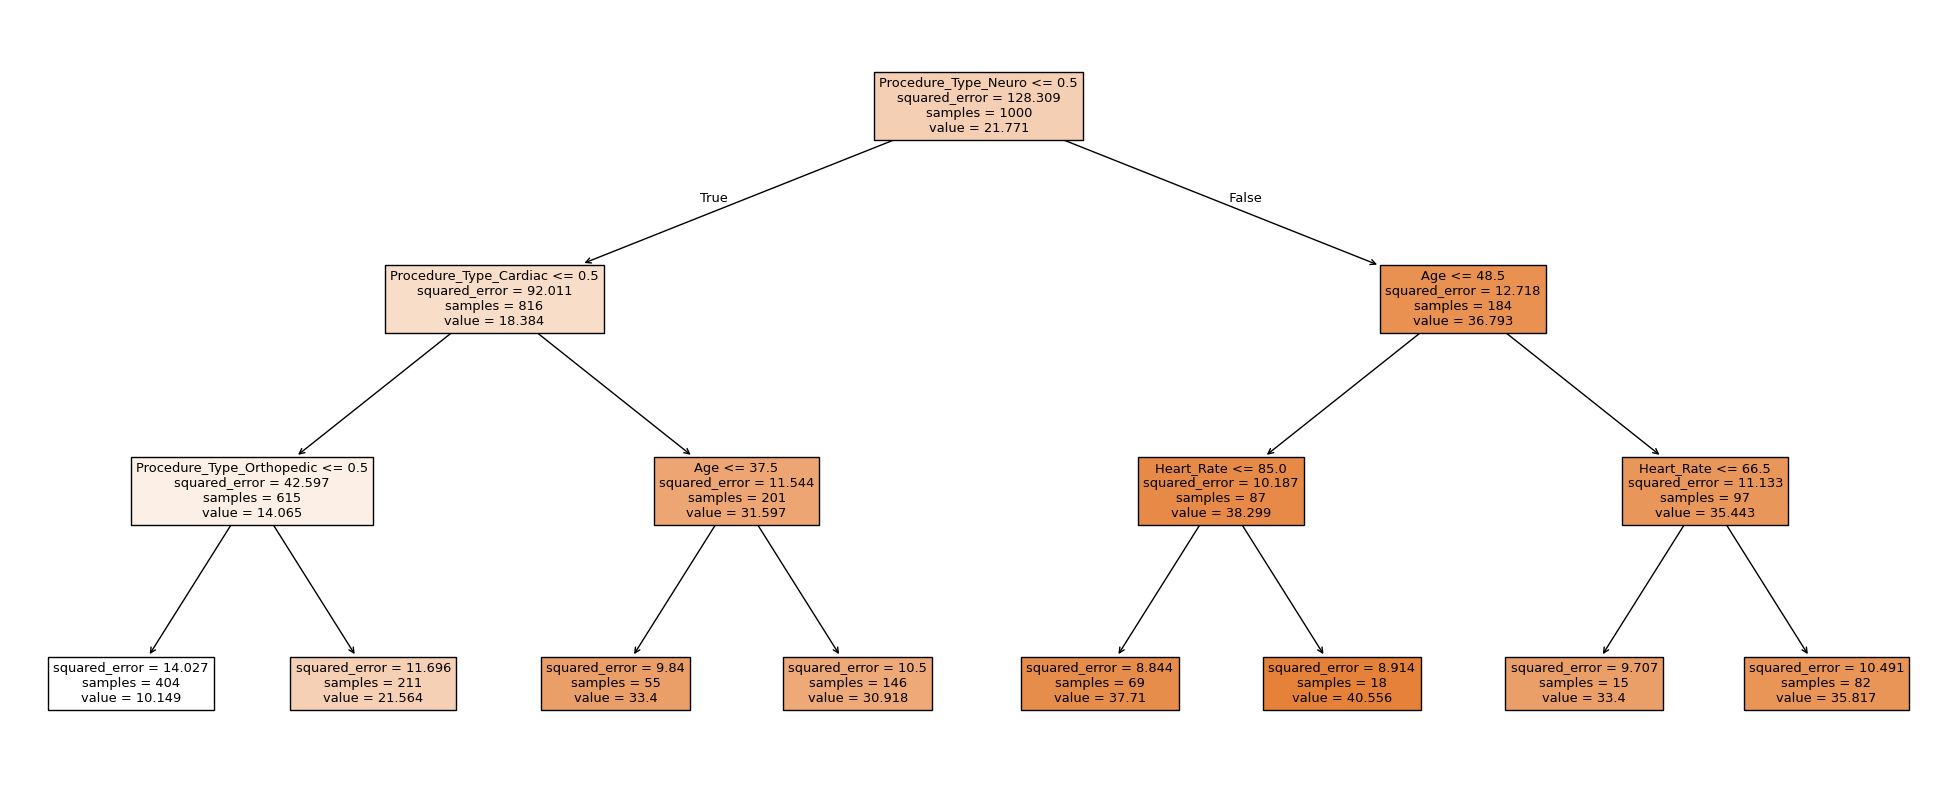

In [134]:
# Fit model separately for visualization
model_viz = DecisionTreeRegressor(max_depth=3)
X_encoded = pd.get_dummies(X)
model_viz.fit(X_encoded, y)

plt.figure(figsize=(25,10))
plot_tree(model_viz, feature_names=X_encoded.columns, filled=True)
plt.show()


### **Step 10 :Tune Hyperparameters**



In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'regressor__max_depth': 3, 'regressor__min_samples_split': 2}


### **Step 11 :Deploying or Exporting the Model**

In [113]:
import joblib

joblib.dump(grid_search.best_estimator_, 'post_surgery_recovery_model.pkl')


['post_surgery_recovery_model.pkl']

#### **Step 12: Conclusion**

This project used a Decision Tree Regression model to predict a patient’s post-surgery recovery time based on factors like procedure type, age, and pre-surgery vitals. The model showed that recovery time varies most with the type of surgery and patient health. It can help hospitals and doctors make better, faster decisions about care and recovery planning.

--------------------------------------------------------------**END**--------------------------------------------------------------